In [1]:
import pandas as pd

In [53]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data exploration

### Reading data

In [10]:
train = pd.read_csv('healthcare/train_data.csv')
train.columns = [s.lower().replace(' ', '_') for s in train.columns]
train.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [11]:
train.shape

(318438, 18)

In [12]:
## data definitions
data_dict = pd.read_csv('healthcare/train_data_dictionary.csv')
data_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [57]:
## Variable that can be dropped of - 
# 1. case_id
# 2. hospital code (may be) -NO
# 3. Available extra rooms in the hospital - give the hypothesis that stay in hospital is independent of available 
# extra rooms
# 4. patient_id
# 5. visitors_with_patient??

### case id

In [14]:
train['case_id'].nunique()
# all unique hence not needed

318438

### city_code_patient  vs city_code_hospital

In [98]:
x = train[['city_code_patient', 'city_code_hospital']]
mask = x['city_code_patient'] == x['city_code_hospital']
len(x[mask])/len(train)

0.0738071461320571

new variable can be created same city code or not

### hospital code

In [15]:
train['hospital_code'].unique()

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20])

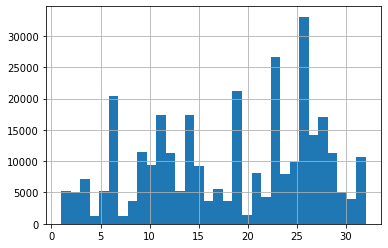

In [23]:
# plotting each hospital code with data counts
train['hospital_code'].hist(bins=train['hospital_code'].nunique())

In [25]:
train.pivot_table(index='hospital_code', columns='stay', values='patientid', aggfunc='count')

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
hospital_code,,,,,,,,,,,
1,369,1062,1335,937,215,716,58,239,154,49,115
2,274,970,972,955,153,943,53,312,181,73,216
3,795,1964,1993,1117,228,574,56,138,79,53,119
4,200,406,370,137,31,63,10,8,5,4,6
5,332,1423,1558,929,151,549,33,124,68,30,64
6,1125,5627,6014,3376,542,2209,122,562,306,165,377
7,202,470,326,168,30,73,5,18,5,2,7
8,217,907,1270,607,129,302,28,99,40,24,40
9,765,2760,3055,2028,329,1578,95,377,215,89,219


### hospital type code

In [26]:
train['hospital_type_code'].unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

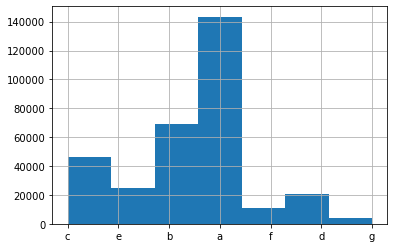

In [28]:
# plotting each hospital type code with data counts
train['hospital_type_code'].hist(bins=train['hospital_type_code'].nunique())

In [30]:
train.pivot_table(index='hospital_type_code', columns='stay', values='patientid', aggfunc='count')

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
hospital_type_code,,,,,,,,,,,
a,10559,39807,40286,23974,4111,14617,924,3722,1890,962,2573
b,5145,13933,19541,12385,3893,6909,917,2608,1026,783,1806
c,3588,10318,12526,8222,1872,5176,430,1611,725,439,1021
d,1314,4423,5527,3706,760,2713,186,761,421,180,398
e,1805,6644,6524,4060,764,2832,197,824,395,218,507
f,1023,2332,1897,2093,204,1960,44,482,254,138,276
g,170,682,1190,719,139,811,46,246,127,45,102


### city code

In [32]:
train['city_code_hospital'].unique()

array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13])

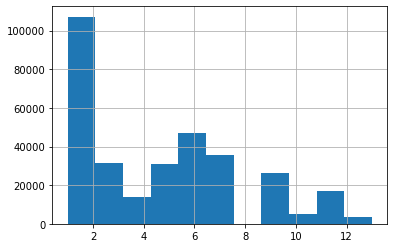

In [34]:
# plotting each city_code_hospital with data counts
train['city_code_hospital'].hist(bins=train['city_code_hospital'].nunique())

### hospital region code

['Z' 'X' 'Y']


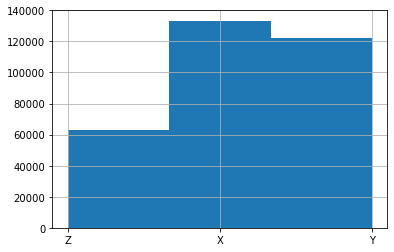

In [38]:
print(train['hospital_region_code'].unique())
train['hospital_region_code'].hist(bins=train['hospital_region_code'].nunique())

In [92]:
train[['hospital_code', 'hospital_type_code', 'hospital_region_code', 'city_code_hospital']].drop_duplicates().\
    sort_values(['hospital_type_code', 'hospital_region_code'])

,hospital_code,hospital_type_code,hospital_region_code,city_code_hospital
5,23,a,X,6
14,6,a,X,6
17,29,a,X,4
33,5,a,X,1
50,14,a,X,1
65,24,a,X,1
120,4,a,X,4
128,7,a,X,4
19,12,a,Y,9
29,27,a,Y,7


In [41]:
# hospital attributes are linked so even having just the hospital code can be enough

### available_extra_rooms_in_hospital

[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]


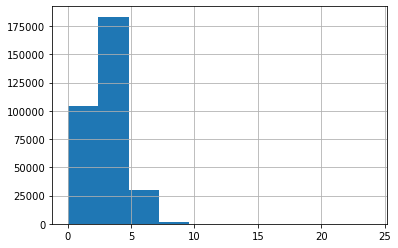

In [42]:
print(train['available_extra_rooms_in_hospital'].unique())
train['available_extra_rooms_in_hospital'].hist()

In [43]:
train.groupby('stay')['available_extra_rooms_in_hospital'].agg(['mean', 'std'])

,mean,std
stay,,
0-10,3.268599,1.192931
11-20,3.262814,1.176184
21-30,3.359008,1.176063
31-40,3.136242,1.135904
41-50,3.334412,1.239631
51-60,2.911731,1.067263
61-70,3.179300,1.225234
71-80,2.872733,1.065078
81-90,2.844977,1.074420


#### Is there a correlation between, stay and mean available rooms? can this be a dependent variable in classification model?

## rest variable

In [58]:


# 6	Department	Department overlooking the case
# 7	Ward_Type	Code for the Ward type
# 8	Ward_Facility_Code	Code for the Ward Facility
# 9	Bed Grade	Condition of Bed in the Ward
# 10	patientid	Unique Patient Id
# 11	City_Code_Patient	City Code for the patient
# 12	Type of Admission	Admission Type registered by the Hospital
# 13	Severity of Illness	Severity of the illness recorded at the time o...
# 14	Visitors with Patient	Number of Visitors with the patient
# 15	Age	Age of the patient
# 16	Admission_Deposit	Deposit at the Admission Time
# 17	Stay	Stay Days by the patient

hospital_type_code ['c' 'e' 'b' 'a' 'f' 'd' 'g'] 7


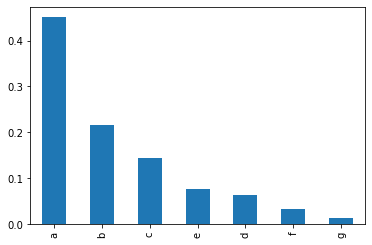

city_code_hospital [ 3  5  1  2  6  9 10  4 11  7 13] 11


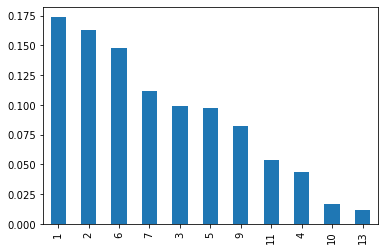

hospital_region_code ['Z' 'X' 'Y'] 3


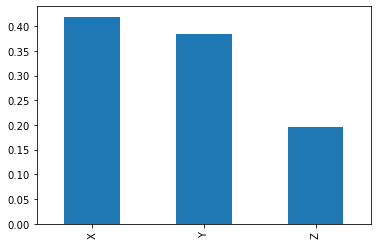

available_extra_rooms_in_hospital [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24] 18


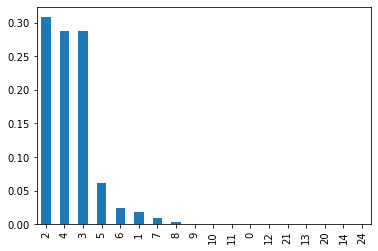

department ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery'] 5


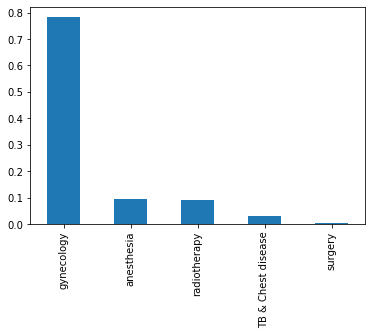

ward_type ['R' 'S' 'Q' 'P' 'T' 'U'] 6


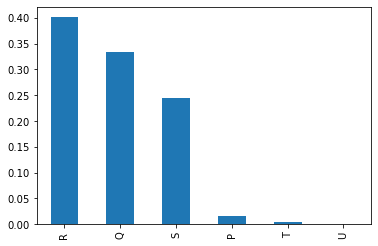

ward_facility_code ['F' 'E' 'D' 'B' 'A' 'C'] 6


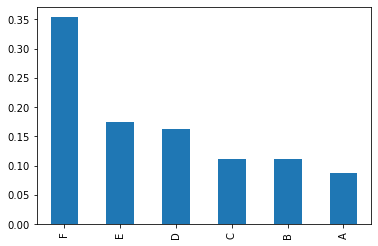

bed_grade [ 2.  3.  4.  1. nan] 4


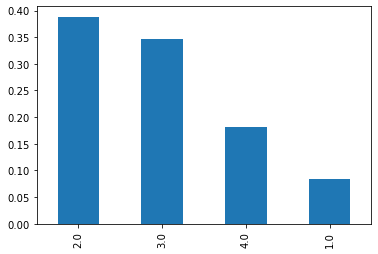

city_code_patient [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.] 37


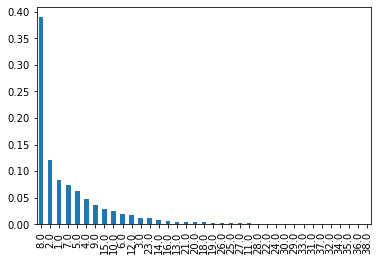

type_of_admission ['Emergency' 'Trauma' 'Urgent'] 3


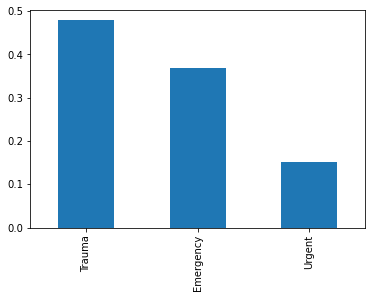

severity_of_illness ['Extreme' 'Moderate' 'Minor'] 3


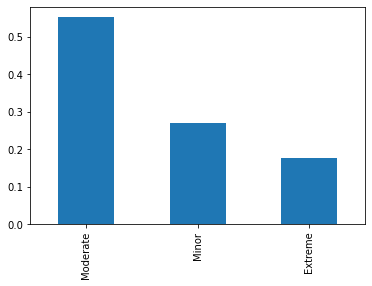

visitors_with_patient [ 2  4  3  8  6  7 13  5  1 10 15 11 12  9 24 16 14 20  0 19 18 17 23 21
 32 30 22 25] 28


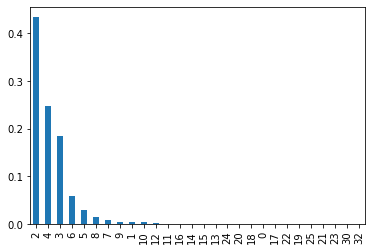

age ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100'] 10


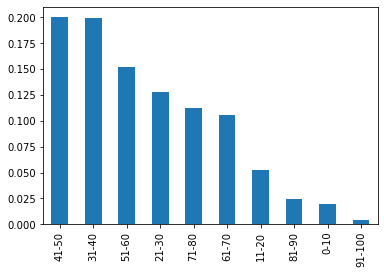

admission_deposit [4911. 5954. 4745. ... 1937. 9439. 2349.] 7300


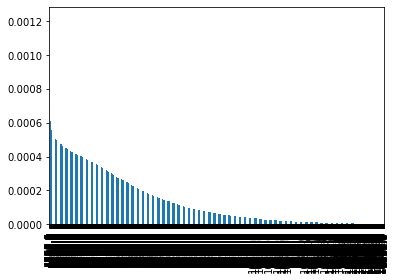

stay ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100'] 11


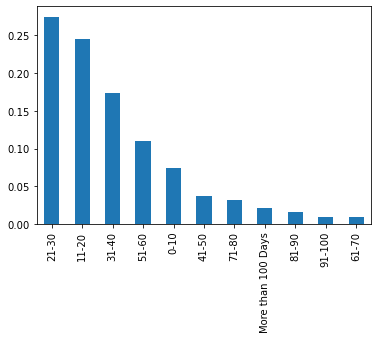

In [129]:
for c in train.columns[2:]:
    if c != 'patientid':
        print(c, train[c].unique(), train[c].nunique())
        plt.figure()
        x = train[c].value_counts()/len(train)
        x.plot(kind='bar')
        plt.show()

In [154]:
.274751+.245382+.173217+.074124

0.7674739999999999

In [153]:
train['stay'].value_counts()/len(train)
# mean(train['admission_deposit'])

21-30                 0.274751
11-20                 0.245382
31-40                 0.173217
51-60                 0.109968
0-10                  0.074124
41-50                 0.036877
71-80                 0.032201
More than 100 Days    0.020987
81-90                 0.015193
91-100                0.008683
61-70                 0.008617
Name: stay, dtype: float64

### null values treatment

In [62]:
train.pivot_table(index='bed_grade', columns='stay', values='patientid', aggfunc='count', dropna=False)

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
bed_grade,,,,,,,,,,,
1.0,2318,5608,7530,4412,1080,3101,275,1006,358,278,539
2.0,9293,25550,41615,20123,5114,13697,1137,3560,1240,925,1417
3.0,7884,31078,25573,20157,3646,11878,834,3637,2045,1011,2840
4.0,4107,15884,12736,10445,1895,6329,494,2047,1194,550,1885


In [66]:
null_bed_grade = train[train['bed_grade'].isnull()]
print(len(null_bed_grade))
null_bed_grade['stay'].value_counts().sort_index()

113


0-10                   2
11-20                 19
21-30                 37
31-40                 22
41-50                  8
51-60                 13
61-70                  4
71-80                  4
81-90                  1
91-100                 1
More than 100 Days     2
Name: stay, dtype: int64

#### Should the be removed? - 
- if impute then with what?
- if there is nan in test then what?

In [68]:
train.pivot_table(index='city_code_patient', columns='stay', values='patientid', aggfunc='count', dropna=False)

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
city_code_patient,,,,,,,,,,,
1.0,1859.0,6544.0,7720.0,4514.0,733.0,3064.0,172.0,737.0,386.0,194.0,454.0
2.0,2446.0,10193.0,11883.0,6376.0,1130.0,4377.0,199.0,940.0,523.0,248.0,554.0
3.0,233.0,751.0,828.0,703.0,175.0,493.0,61.0,187.0,93.0,69.0,179.0
4.0,1432.0,3965.0,3986.0,2556.0,669.0,1639.0,126.0,433.0,215.0,123.0,236.0
5.0,1588.0,4583.0,4997.0,3608.0,816.0,2436.0,230.0,807.0,335.0,197.0,482.0
6.0,631.0,1735.0,1424.0,1027.0,210.0,548.0,51.0,181.0,72.0,49.0,77.0
7.0,1691.0,5840.0,6269.0,4233.0,808.0,2843.0,200.0,766.0,449.0,194.0,514.0
8.0,8266.0,28786.0,34796.0,21898.0,4922.0,13461.0,1176.0,4446.0,1965.0,1184.0,3111.0
9.0,1044.0,2905.0,3011.0,2060.0,504.0,1300.0,125.0,376.0,162.0,112.0,196.0


In [69]:
null_city_code_patient = train[train['city_code_patient'].isnull()]
print(len(null_city_code_patient))
null_city_code_patient['stay'].value_counts().sort_index()

4532


0-10                   352
11-20                 1025
21-30                 1138
31-40                  825
41-50                  194
51-60                  542
61-70                   42
71-80                  154
81-90                   76
91-100                  51
More than 100 Days     133
Name: stay, dtype: int64

In [124]:
4532/len(train), 113/len(train)

(0.014231969802598936, 0.00035485714644609)

In [121]:
nonnull_city_code_patient = train[~train['city_code_patient'].isnull()]
print(nonnull_city_code_patient.shape)
sum(nonnull_city_code_patient['city_code_patient'] == nonnull_city_code_patient['city_code_hospital'])/len(nonnull_city_code_patient)

(313906, 18)


0.07487273260147942

In [169]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [170]:
train.columns

Index(['hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'city_code_patient', 'type_of_admission', 'severity_of_illness',
       'visitors_with_patient', 'age', 'admission_deposit', 'stay'],
      dtype='object')

#### city of a patient has nothing to do with the severity hence it can be dropped for modelling

variables that can be used - 
1. hospital code - categorical
2. hospital type code - categorical
3. city code hospital - categorical (numeric but to be considered as categorical variables)
4. hospital region code - categorical
5. available_extra_rooms_in_hospital - numeric
6. department - categorical
7. ward_type - categorical
8. ward_facility_code - categorical
9. bed_grade - categorical (numeric but to be considered as categorical variables) ??
10. city_code_patient
11. type_of_admission - categorical
12. severity_of_illness - categorical
13. vistors_with_patient - can be used as a proxy for severity
14. age - categorical
15. admission_deposit - numeric ??

### Questions - 
1. do we need bed grade
2. do we need admission_deposit
3. do we need visitors_with_patient
4. do we need available_extra_rooms_in_hospital
5. why does gynecology have a lot of patient?
6. 

### Coverting city code hospital, bed_grade, hospital_code to category

In [162]:
train['city_code_hospital'] = train['city_code_hospital'].astype(str)
train['bed_grade'] = train['bed_grade'].astype(str)
train['hospital_code'] = train['hospital_code'].astype(str)


### Interactive plt of categorical with target

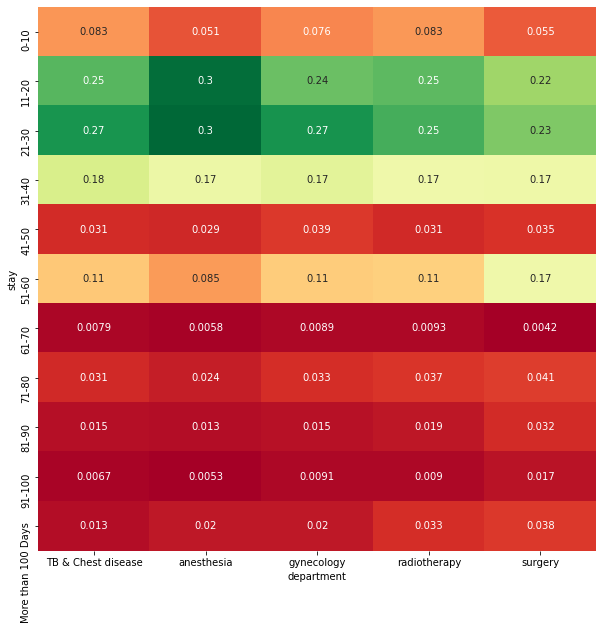

In [173]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['department'], values=train['stay'], aggfunc='count', normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### For most department stay range from 11-40 days

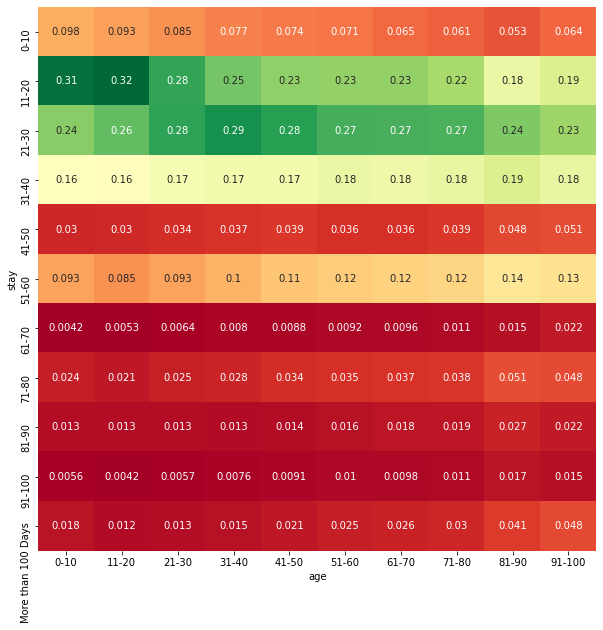

In [174]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['age'], values=train['stay'], aggfunc='count', normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### Youger group 0-20, stay maximum for 11-20 days, while for rest its 21-30 days

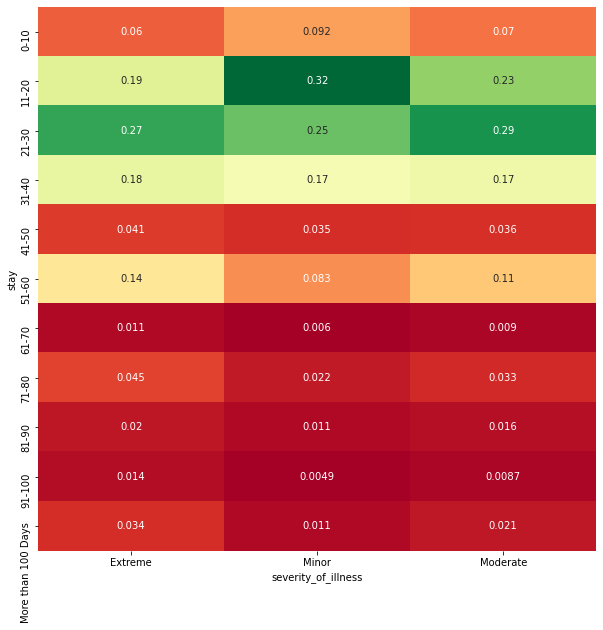

In [175]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['severity_of_illness'], values=train['stay'], aggfunc='count',
               normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### Minor severity stay - 11-20, rest 21-30

Column name hospital_code
Unique values =  32


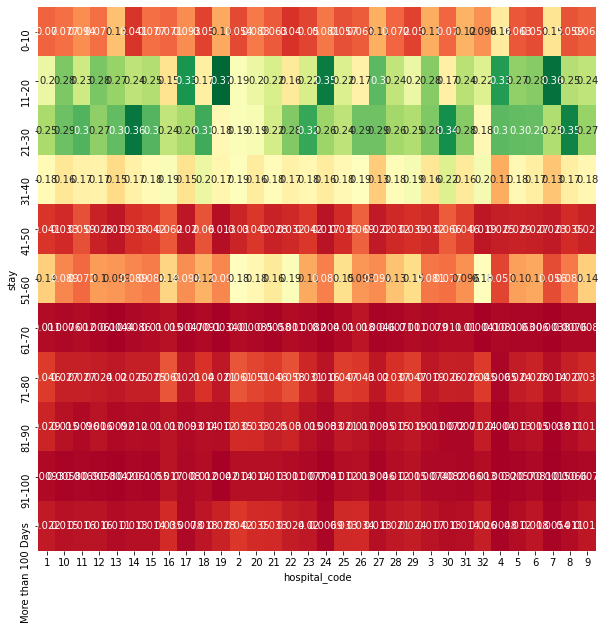

In [177]:
c = 'hospital_code'
print('Column name', c)
print('Unique values = ', train[c].nunique())
f, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(
    pd.crosstab(train['stay'], train[c], values=train['stay'], aggfunc='count',
               normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)


#### too many

Column name hospital_code
Unique values =  32
Column name hospital_type_code
Unique values =  7
Column name city_code_hospital
Unique values =  11
Column name hospital_region_code
Unique values =  3
Column name department
Unique values =  5
Column name ward_type
Unique values =  6
Column name ward_facility_code
Unique values =  6
Column name bed_grade
Unique values =  5
Column name type_of_admission
Unique values =  3
Column name severity_of_illness
Unique values =  3
Column name age
Unique values =  10


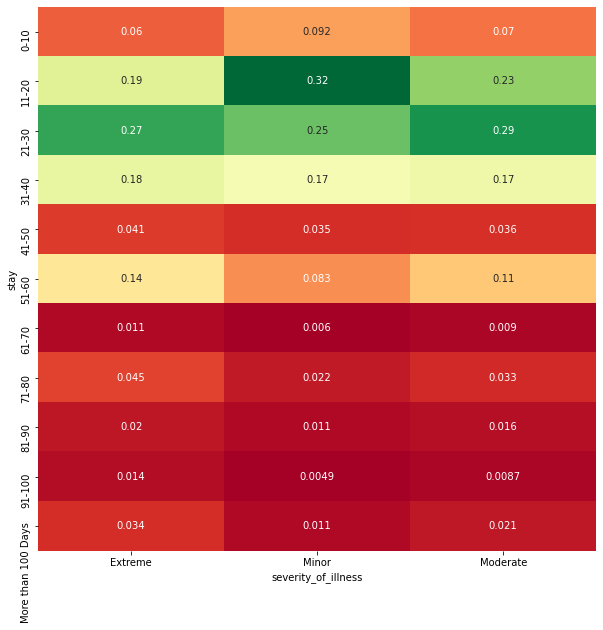

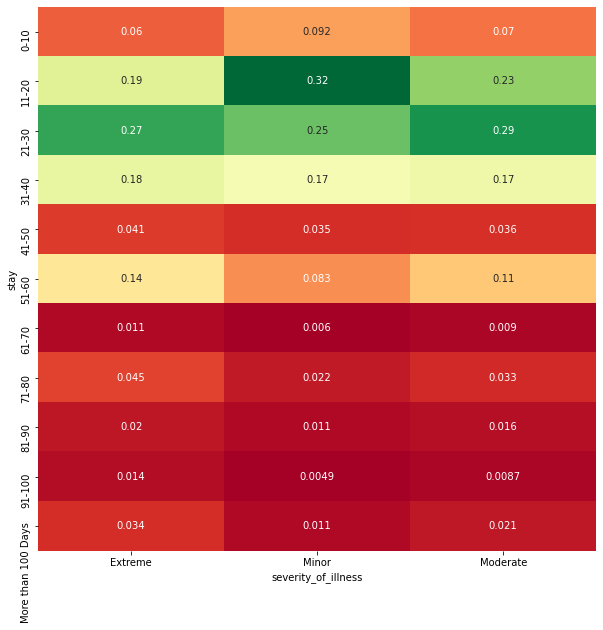

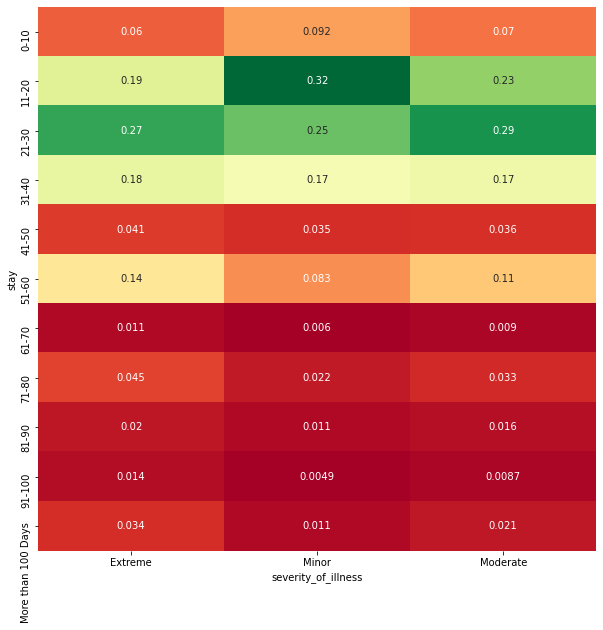

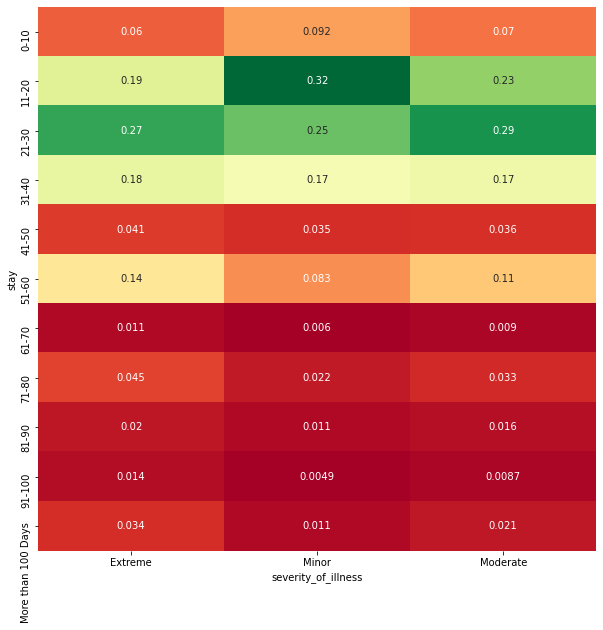

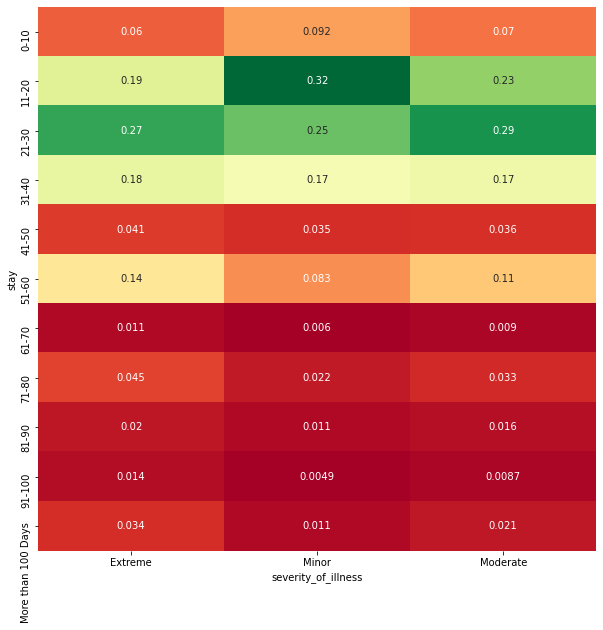

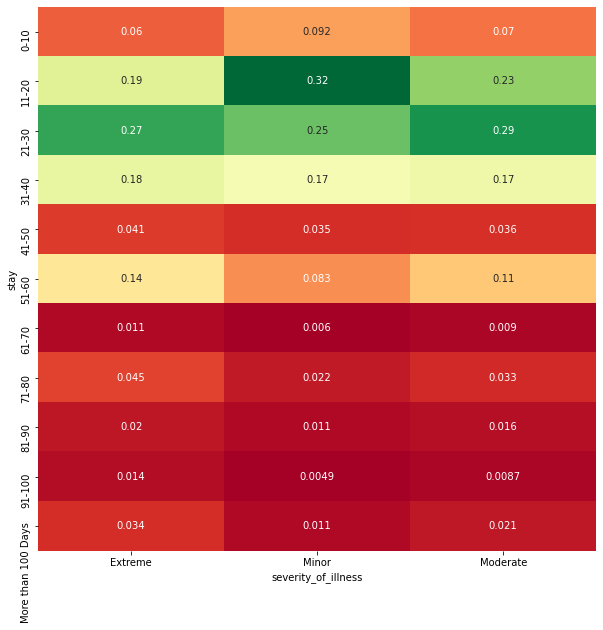

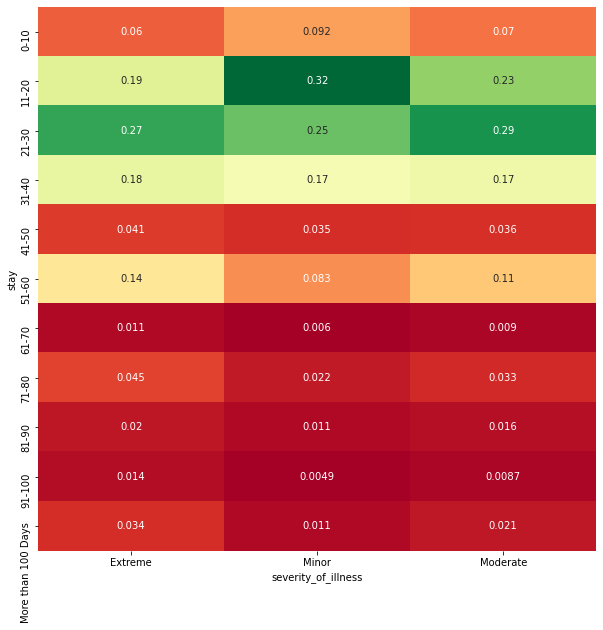

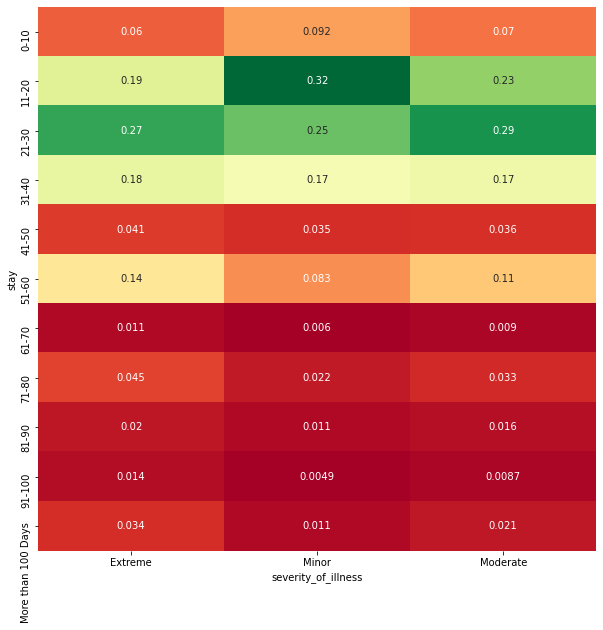

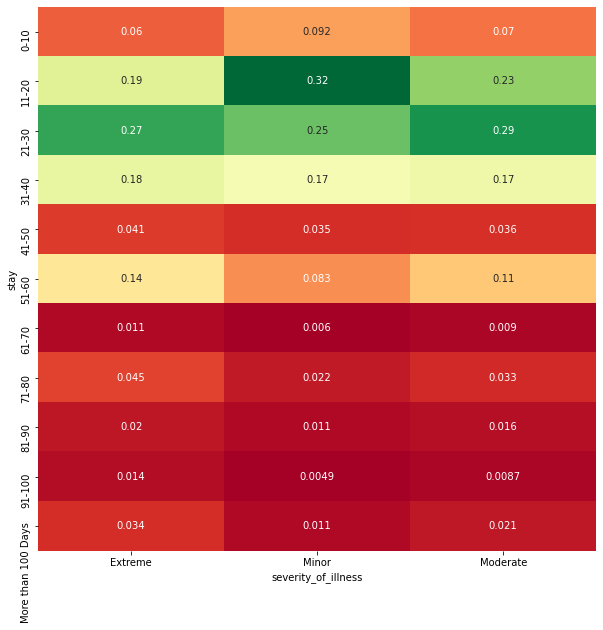

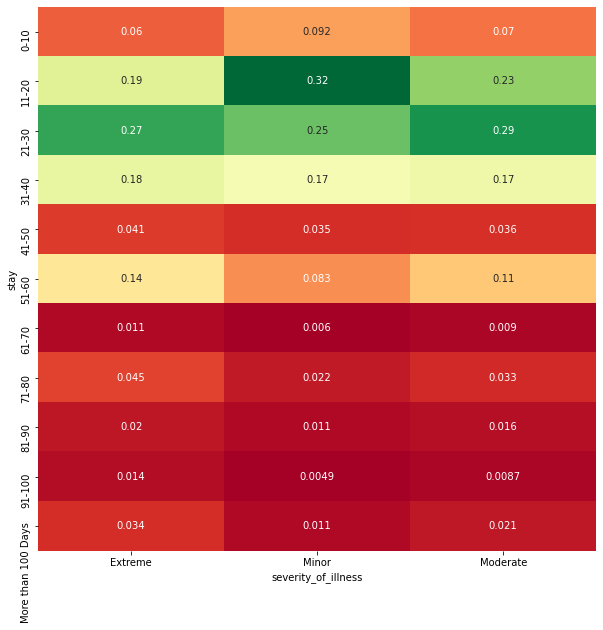

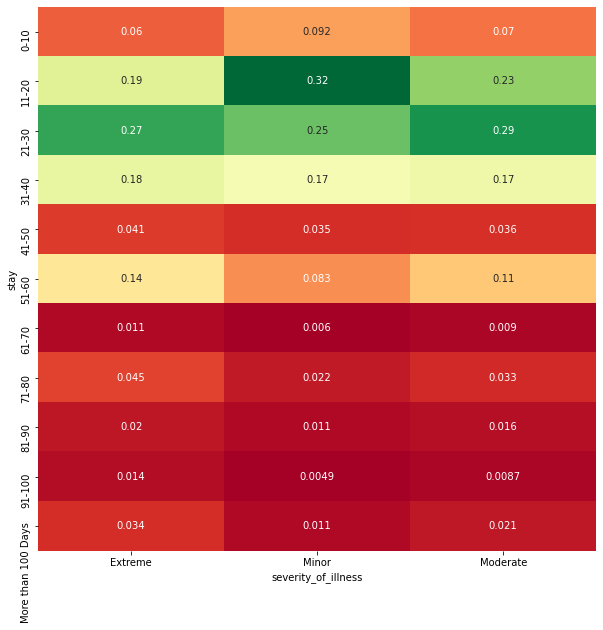

In [167]:
for c in train.columns[:-1]:
    if train[c].dtype == 'O':
        print('Column name', c)
        print('Unique values = ', train[c].nunique())
        f, ax = plt.subplots(figsize=(10, 10))

        ax

### Numeric predictors with target variable plots

In [ ]:
plt.figure()
plt.plot()